# Klasyfikatory złożone

# Zadanie 1

In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from imblearn.metrics import geometric_mean_score
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer, confusion_matrix

In [2]:
df = pd.read_csv("ensembles.txt", sep='\t')
df.head()

dissim      el0      el1      el2      el3      el4      el5      el6  \
0  0.014586  0.59604  0.68085  0.65957  0.52070  0.54953  0.56784  0.56398   
1  0.014659  0.58867  0.67280  0.65477  0.51647  0.54661  0.56482  0.56016   
2  0.014937  0.57180  0.65477  0.64058  0.50351  0.53740  0.56018  0.55226   
3  0.015232  0.55410  0.63633  0.62817  0.49144  0.52709  0.55613  0.54340   
4  0.015367  0.54326  0.62562  0.62123  0.48406  0.52133  0.55343  0.53821   

       el7      el8  ...   stat68   stat69   stat70   stat71    stat72  \
0  0.55124  0.49166  ...  0.29450  0.82652  0.24611  0.48535  0.035907   
1  0.55024  0.49027  ...  0.30351  0.85490  0.24597  0.49558  0.042211   
2  0.54304  0.48418  ...  0.31521  0.89496  0.24546  0.51745  0.051145   
3  0.53398  0.47832  ...  0.32157  0.55918  0.24626  0.53640  0.055997   
4  0.52881  0.47560  ...  0.32343  0.35450  0.24731  0.54198  0.057434   

     stat73    stat74   stat75  stat76  class  
0  0.586120  0.029229  0.20286  1.2244      1  
1  0.621670  0.028426  0.21693  1.1887      1  
2  0.680160  0.026267  0.23835  1.1411      1  
3  0.286820  0.025797  0.25366  1.1159      1  
4  0.091295  0.026116  0.25791  1.0927      1  

[5 rows x 126 columns]

In [3]:
df.describe()

dissim           el0           el1           el2           el3  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.013954      0.355024      0.437803      0.405671      0.392544   
std        0.002686      0.180314      0.137209      0.129951      0.122911   
min        0.002017      0.045790      0.048038      0.069229      0.047150   
25%        0.012795      0.218508      0.339855      0.310645      0.304350   
50%        0.014276      0.299275      0.405210      0.378055      0.364315   
75%        0.015697      0.443217      0.515558      0.474867      0.461185   
max        0.020490      0.958410      0.923450      0.923050      0.931130   

                el4           el5           el6           el7           el8  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.403440      0.489532      0.492610      0.474111      0.477140   
std        0.116376      0.091624      0.088492      0.084144      0.086987   
min        0.042740      0.044226      0.037508      0.030355      0.032707   
25%        0.321487      0.438667      0.444090      0.428905      0.429847   
50%        0.383505      0.487335      0.491235      0.472745      0.474605   
75%        0.468103      0.540980      0.546588      0.518520      0.522340   
max        0.935420      0.968900      0.928220      0.925990      0.907240   

       ...        stat68        stat69        stat70        stat71  \
count  ...  10000.000000  10000.000000  10000.000000  10000.000000   
mean   ...      0.283543      0.311534      0.283997      0.338076   
std    ...      0.102810      0.195606      0.102678      0.139712   
min    ...     -0.074195     -0.150880     -0.060446      0.036154   
25%    ...      0.214230      0.201137      0.212500      0.254798   
50%    ...      0.289575      0.326205      0.288375      0.322530   
75%    ...      0.348492      0.430180      0.348955      0.401560   
max    ...      0.761820      1.018100      0.709970      1.354000   

             stat72        stat73        stat74        stat75        stat76  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.051307      0.082813      0.051865      0.096239      1.539304   
std        0.056886      0.123131      0.057882      0.122810      0.309850   
min       -0.054096     -0.059679     -0.055134     -0.046299      0.345780   
25%        0.014041     -0.002511      0.014020      0.030148      1.371300   
50%        0.044452      0.056012      0.044019      0.066653      1.590100   
75%        0.075739      0.125645      0.076381      0.121210      1.758650   
max        0.504070      0.830710      0.433360      1.795600      2.142200   

              class  
count  10000.000000  
mean       0.956900  
std        0.203092  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  

[8 rows x 126 columns]

In [4]:
len(df.columns)

126

In [5]:
df['class'].value_counts()

class
1    9569
0     431
Name: count, dtype: int64

In [6]:
df.isna().sum().sum()

0

In [7]:
df.dtypes.value_counts()

float64    125
int64        1
Name: count, dtype: int64

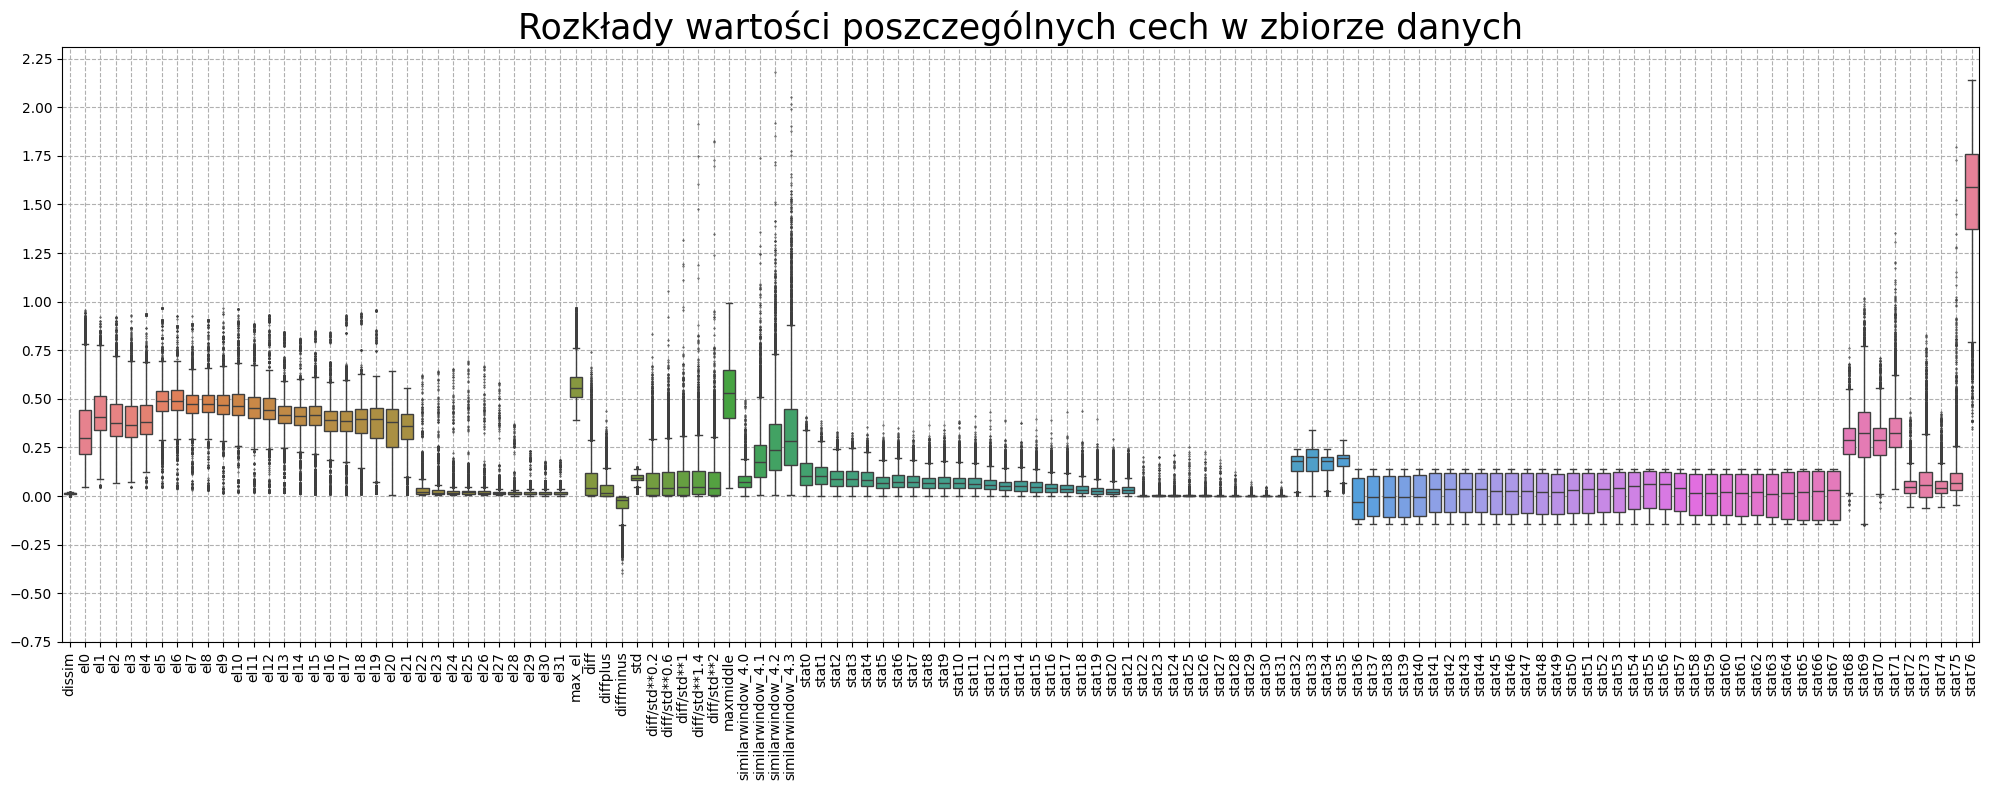

In [8]:
df_plot = df.drop(columns=['class'])
plt.figure(figsize=(20, 8))

p = sns.boxplot(data=df_plot, fliersize=0.5)
_ = p.set(yticks=np.arange(-0.75, 2.5, 0.25))

plt.xticks(rotation=90)
plt.title("Rozkłady wartości poszczególnych cech w zbiorze danych", fontsize=25)
plt.grid(linestyle='--')
plt.tight_layout()
plt.savefig("rozklad.png")
plt.show();

In [9]:
X = df.drop(columns=['class'])
y = df['class']

W zbiorze występuje 1000 próbek z czego każda posiada 126 atrybutów (ostatni to klasa decyzyjna). Wszystkie z cech to liczby rzeczywiste. W zbiorze nie ma wartości pustych. Zakresy poszczególnych wartości cech minimalnie różnią się między sobą - w zdecydowanej większości znajdują się w zakresie od 0 do 1 (z wartościami odstającymi dla similarwindow). Cechy można podzielić na parę grup:
- el0-el21 - wartości w większości w zakresie 0.25-0.5 z wartościami odstającymi od 0 do 1.
- el22-el31 - wartości bardzo bliskie 0.
- max_el - similar_window - wartości bardziej zróżnicowane niż poprzednie grupy, ale nadal pomiędzy 0 a 1 z wyjątkiem diffminus, która jest jedną z niewielu cech, która posiada wartości na minusie. similarwindow posiadają dużo wartości odstających. 
- stat0-stat35 - wartości od 0 do maksymalnie 0.5.
- stat36-stat67 - wyróżniający się blok cech o większym IQR od pozostałych, wszystkie z tych cech mają podobny rozkład i nie mają wartości odstających.
- stat68-stat76 - niektóre z cech dla tej grupy posiadają wartości mniejsze od 0 oraz większe od 1. Z tej grupy zdecydowanie wyróżnia się stat76, który ma wartości z zakresu od 0.5 do ponad 2.0.

W zbiorze znajduje się 9569 próbek z klasą 1, a 431 z klasą 0.

# Zadanie 2

[0.27067396 0.14776539]


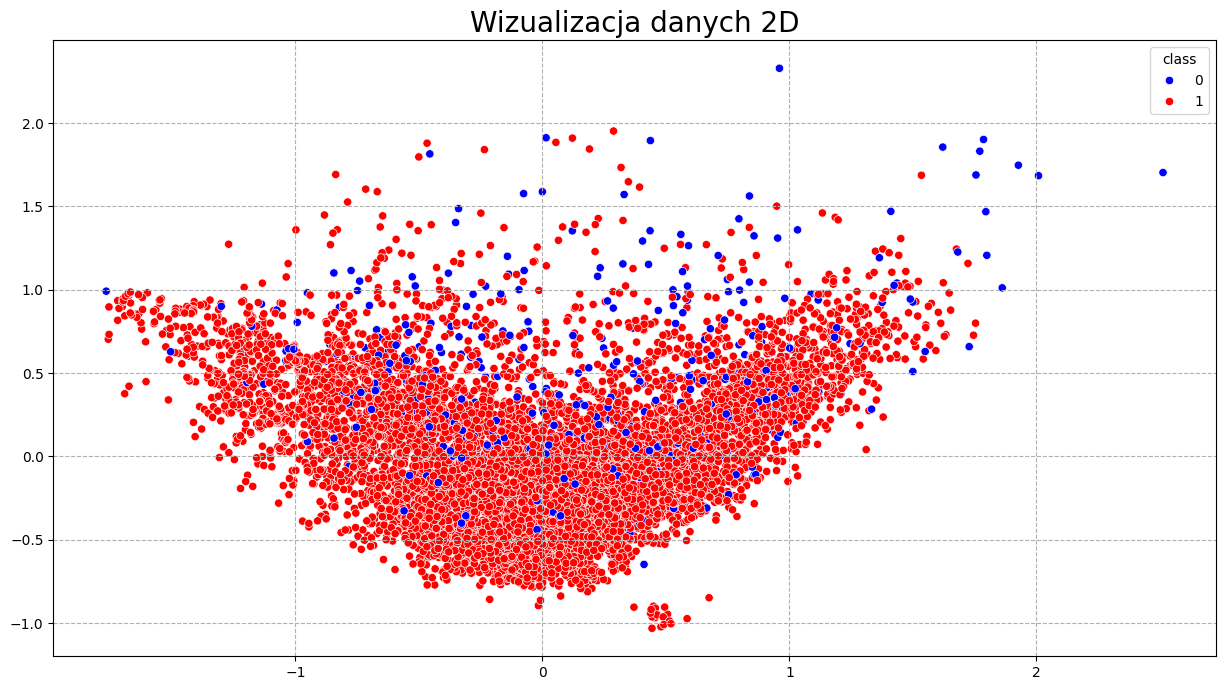

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
X_pca = pd.DataFrame(X_pca, columns=['x', 'y'])
X_pca['class'] = y

plt.figure(figsize=(15, 8))
sns.scatterplot(pd.DataFrame(X_pca), x='x', y='y', hue='class', hue_order=[0, 1], palette={0: 'blue', 1: 'red'})
plt.title("Wizualizacja danych 2D", fontsize=20)
plt.xlabel("")
plt.ylabel("")
# plt.rc('axes', axisbelow=True)
plt.grid(linestyle='--')
plt.savefig("visualization_2d.png")
plt.show();

[0.27067396 0.14776539 0.08403319]


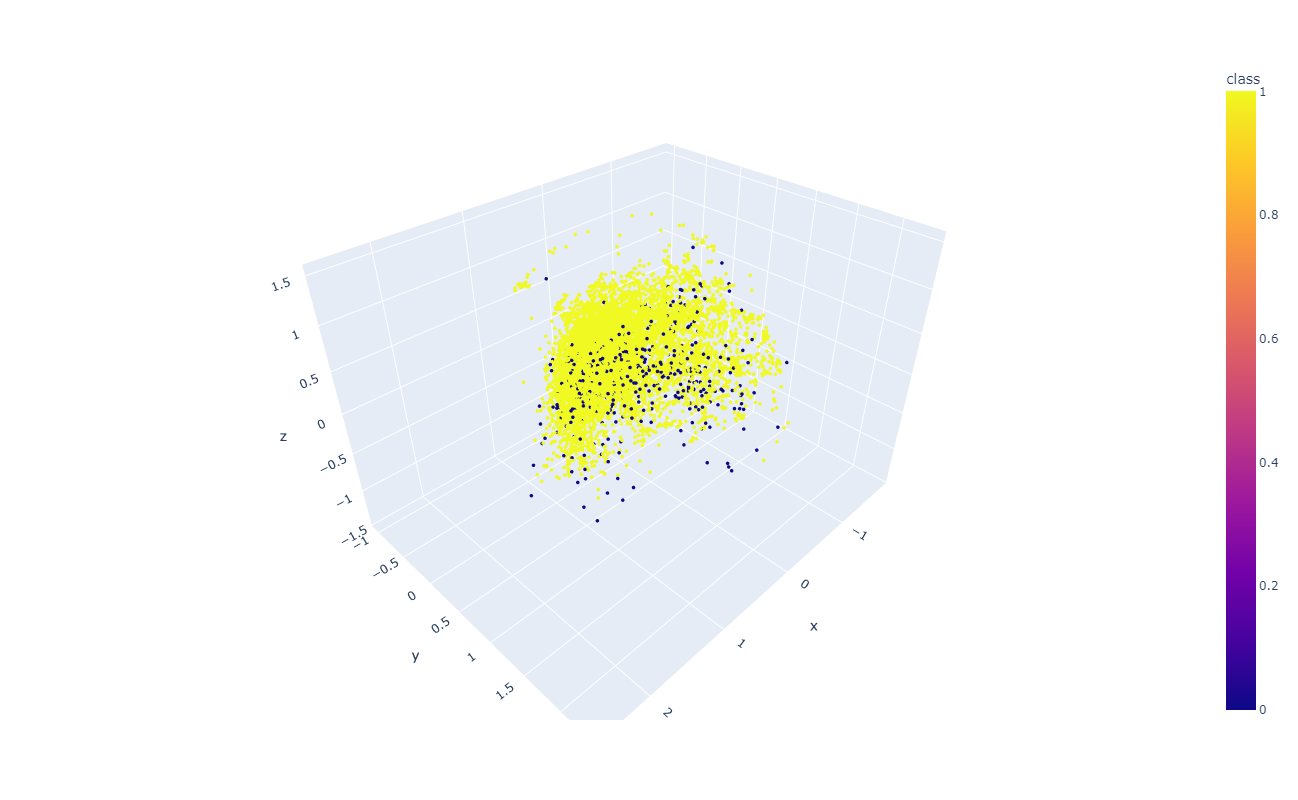

In [11]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
X_pca = pd.DataFrame(X_pca, columns=['x', 'y', 'z'])
X_pca['class'] = y

fig = px.scatter_3d(X_pca, x='x', y='y', z='z', color='class')
fig.update_traces(marker=dict(size=2))
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()

Na wykresie 2D widać overlapping, ale na pierwszej składowej mamy wyjaśnialność 0.27, a na drugiej 0.14, więc być może uda się zniwelować ten problem na oryginalnych wymiarach (dzięki temu, że będzie ich po prostu więcej).  Trudno powiedzieć na podstawie tych wykresów, które z klasyfikatorów poradzą sobie lepiej, a które gorzej, ponieważ istnieje spora część informacji, które zawarte są w oryginalnym zbiorze, a której nie widać na wizualizacji. Na wykresie 3D uzyskujemy odpowiednio 0.27, 0.14 i 0.08 wyjaśnialności.

# Zadanie 3

Czym on się różni od parametru estimators oraz estimator/base_estimator? Pamiętaj o różnorodnych, poznanych do tej pory klasyfikatorach – DecisionTreeClassifier, SVC, MLPClassifier, GaussianNB i QuadraticDiscriminantAnalysis.

n_estimators - RandomForestClassifier, AdaBoostClassifier. Różni się od parametru estimators tym, że oznacza liczbę klasyfikatorów, które używane są w algorytmie. Parametr estimators oznacza typ klasyfikatora, na przykład drzewo albo SVC.

# Zadanie 4

In [13]:
classifiers = {
    'random_forest': RandomForestClassifier(n_jobs=-1),
    'ada_boost': AdaBoostClassifier(algorithm='SAMME'),
    'ada_boost_gnb': AdaBoostClassifier(GaussianNB(), algorithm='SAMME'),
    'vote_tree_gnb': VotingClassifier(
        [('tree', DecisionTreeClassifier()), ('gnb', GaussianNB())],
    ),
    'vote_tree_svc': VotingClassifier(
        [('tree', DecisionTreeClassifier()), ('svc', SVC())],
    ),
    'vote_svc_gnb': VotingClassifier(
        [('svc', SVC()), ('gnb', GaussianNB())],
    ),
    'vote_tree_svc_gnb': VotingClassifier(
        [('tree', DecisionTreeClassifier()), ('svc', SVC()), ('gnb', GaussianNB())],
    ),
    'stack_knn': StackingClassifier(
        [('knn', KNeighborsClassifier())]
    ),
    'stack_tree': StackingClassifier(
        [('tree', DecisionTreeClassifier())]
    ),
    'stack_tree_gnb': StackingClassifier(
        [('tree', DecisionTreeClassifier()), ('gnb', GaussianNB())],
    ),
    'stack_tree_svc': StackingClassifier(
        [('tree', DecisionTreeClassifier()), ('svc', SVC())],
    ),
    'stack_svc_gnb': StackingClassifier(
        [('svc', SVC()), ('gnb', GaussianNB())],
    ),
    'stack_tree_svc_gnb': StackingClassifier(
        [('tree', DecisionTreeClassifier()), ('svc', SVC()), ('gnb', GaussianNB())],
    ),
}

fold_10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
metrics = []
for name, classifier in classifiers.items():
    print(f"{'-'*15} {name} {'-'*15}")
    print("Fold ", end="")
    for i, (train_index, test_index) in enumerate(fold_10.split(X, y)):
        print(f"{i+1} ", end="")
        X_train, y_train, X_test, y_test = X.loc[train_index], y.loc[train_index], X.loc[test_index], y.loc[test_index]
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        g_mean = geometric_mean_score(y_test, y_pred)
        roc = roc_auc_score(y_test, y_pred)
        metrics.append({'model': name, 'accuracy': accuracy, 'g_mean': g_mean, 'roc': roc})
    print("\n", end="")

df_result = pd.DataFrame(metrics)

--------------- random_forest ---------------
Fold 1 2 3 4 5 6 7 8 9 10 
--------------- ada_boost ---------------
Fold 1 2 3 4 5 6 7 8 9 10 
--------------- ada_boost_gnb ---------------
Fold 1 2 3 4 5 6 7 8 9 10 
--------------- vote_tree_gnb ---------------
Fold 1 2 3 4 5 6 7 8 9 10 
--------------- vote_tree_svc ---------------
Fold 1 2 3 4 5 6 7 8 9 10 
--------------- vote_svc_gnb ---------------
Fold 1 2 3 4 5 6 7 8 9 10 
--------------- vote_tree_svc_gnb ---------------
Fold 1 2 3 4 5 6 7 8 9 10 
--------------- stack_knn ---------------
Fold 1 2 3 4 5 6 7 8 9 10 
--------------- stack_tree ---------------
Fold 1 2 3 4 5 6 7 8 9 10 
--------------- stack_tree_gnb ---------------
Fold 1 2 3 4 5 6 7 8 9 10 
--------------- stack_tree_svc ---------------
Fold 1 2 3 4 5 6 7 8 9 10 
--------------- stack_svc_gnb ---------------
Fold 1 2 3 4 5 6 7 8 9 10 
--------------- stack_tree_svc_gnb ---------------
Fold 1 2 3 4 5 6 7 8 9 10 


In [14]:
df_group = df_result.groupby('model').mean()
df_group

accuracy    g_mean       roc
model                                           
ada_boost             0.9579  0.408965  0.583760
ada_boost_gnb         0.8517  0.683164  0.707378
random_forest         0.9635  0.430804  0.593217
stack_knn             0.9569  0.000000  0.500000
stack_svc_gnb         0.9569  0.000000  0.500000
stack_tree            0.9569  0.000000  0.500000
stack_tree_gnb        0.9569  0.000000  0.500000
stack_tree_svc        0.9569  0.000000  0.500000
stack_tree_svc_gnb    0.9569  0.000000  0.500000
vote_svc_gnb          0.7680  0.676942  0.684748
vote_tree_gnb         0.7526  0.710530  0.713217
vote_tree_svc         0.9401  0.604426  0.673905
vote_tree_svc_gnb     0.9544  0.512799  0.629288

In [15]:
df_melted = pd.melt(df_result, id_vars=['model'], var_name='metryka', value_name='metric_value')

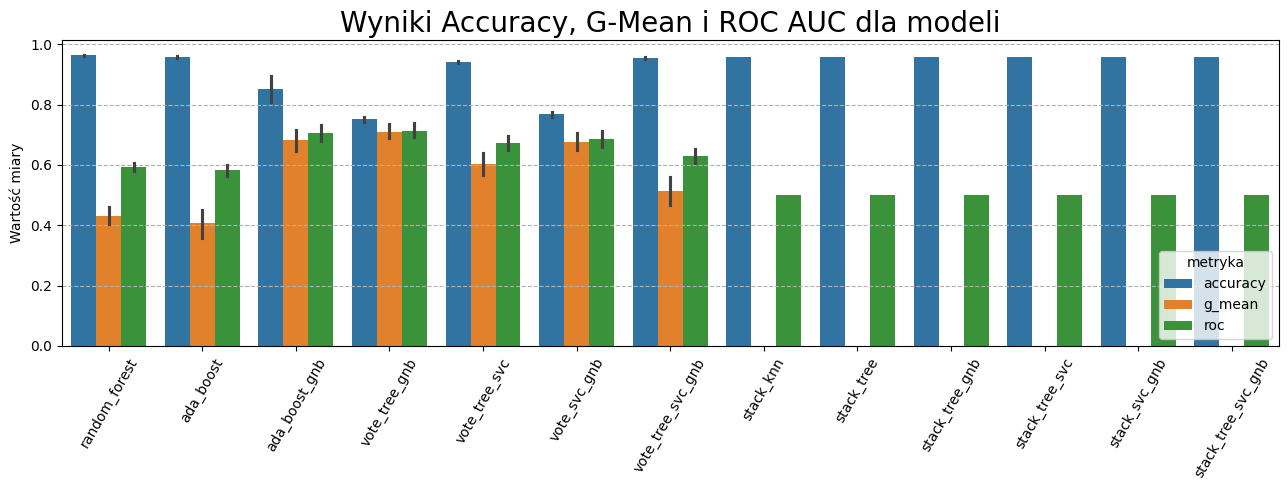

In [16]:
plt.figure(figsize=(13, 5))
ax = sns.barplot(data=df_melted, x='model', y='metric_value', hue='metryka')
plt.xticks(rotation=60)
plt.title("Wyniki Accuracy, G-Mean i ROC AUC dla modeli", fontsize=20)
plt.xlabel("")
plt.ylabel("Wartość miary")
plt.grid(linestyle='--', axis='y')
plt.tight_layout()
plt.savefig("metrics_bare.png")
plt.show();

W ramach zadania przetestowałem 13 różnych klasyfikatorów (dodatkowo na wykresie dodałem miary accuracy i roc auc):
1. Las losowy - domyślne parametry nie radzą sobie najlepiej biorąc pod uwagę wartość 0.4 na G-mean oraz niski ROC AUC 0.58
2. AdaBoost - dla tego rodzaju przetestowałem dwa rozdaje - domyślny który wykorzystuje Decision Stump jako klasyfikator i osiągnął on wartości poszczególnych miar podobne do lasu losowego oraz jako klasyfikator GaussianNB, który poradzil sobie znacznie lepiej - można powiedzieć, że jest jednym z dwóch najlepszych wytrenowanych modeli - 0.68 dla G-Mean oraz 0.7 dla ROC AUC.
3. Voting - drugim wśród najlepszych klasyfikatorów jest Voting wykorzystujący drzewo decyzyjne oraz GaussianNB. Osiąga on wartość ponad 0.7 dla G-Mean. Pozostałe z badanych klasyfikatorów typu Voting radzą sobie gorzej, ale nadal lepiej niż las losowy. Przetestowane zostały Drzewo+SVC, SVC+GaussianNB, Drzewo+SVC+GaussianNB, osiągają one odpowiednio 0.6, 0.67 oraz 0.51 dla miary G-Mean. 
4. Stacking - tutaj pojawiło się dla mnie zaskoczenie, ponieważ stacking w każdej z badanych (a było ich sporo bo aż 6) kombinacji daje wyniki takie jak zwykły ZeroRule - 0.0 dla G-Mean oraz 0.5 na ROC AUC. Sprawdziłem również mój kod innych danych i wtedy wyniki były zbliżone do oczekiwanych (nie 0.0 dla G-Mean :) ), więc nie jest to problem złej konfiguracji w programie. Powodem takich wyników może być duży overlapping klas w zbiorze danych, który dostałem.

Najlepiej radzą sobie algorytmy boostingu oraz votingu.

# Zadanie 5

In [17]:
classifiers = {
    'random_forest': RandomForestClassifier(n_jobs=-1),
    'ada_boost': AdaBoostClassifier(algorithm='SAMME'),
    'ada_boost_gnb': AdaBoostClassifier(GaussianNB(), algorithm='SAMME'),
    'vote_tree_gnb': VotingClassifier(
        [('tree', DecisionTreeClassifier()), ('gnb', GaussianNB())],
    ),
    'vote_tree_svc': VotingClassifier(
        [('tree', DecisionTreeClassifier()), ('svc', SVC())],
    ),
    'vote_svc_gnb': VotingClassifier(
        [('svc', SVC()), ('gnb', GaussianNB())],
    ),
    'vote_tree_svc_gnb': VotingClassifier(
        [('tree', DecisionTreeClassifier()), ('svc', SVC()), ('gnb', GaussianNB())],
    ),
    'stack_knn': StackingClassifier(
        [('knn', KNeighborsClassifier())]
    ),
    'stack_tree': StackingClassifier(
        [('tree', DecisionTreeClassifier())]
    ),
    'stack_tree_gnb': StackingClassifier(
        [('tree', DecisionTreeClassifier()), ('gnb', GaussianNB())],
    ),
    'stack_tree_svc': StackingClassifier(
        [('tree', DecisionTreeClassifier()), ('svc', SVC())],
    ),
    'stack_svc_gnb': StackingClassifier(
        [('svc', SVC()), ('gnb', GaussianNB())],
    ),
    'stack_tree_svc_gnb': StackingClassifier(
        [('tree', DecisionTreeClassifier()), ('svc', SVC()), ('gnb', GaussianNB())],
    ),
}

fold_10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
metrics = []
for name, classifier in classifiers.items():
    print(f"{'-'*15} {name} {'-'*15}")
    print("Fold ", end="")
    for i, (train_index, test_index) in enumerate(fold_10.split(X, y)):
        print(f"{i+1} ", end="")
        X_train, y_train, X_test, y_test = X.loc[train_index], y.loc[train_index], X.loc[test_index], y.loc[test_index]
        pipe = make_pipeline(StandardScaler(), classifier)
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        g_mean = geometric_mean_score(y_test, y_pred)
        roc = roc_auc_score(y_test, y_pred)
        metrics.append({'model': name, 'accuracy': accuracy, 'g_mean': g_mean, 'roc': roc})
    print("\n", end="")

df_result_stand = pd.DataFrame(metrics)

--------------- random_forest ---------------
Fold 1 2 3 4 5 6 7 8 9 10 
--------------- ada_boost ---------------
Fold 1 2 3 4 5 6 7 8 9 10 
--------------- ada_boost_gnb ---------------
Fold 1 2 3 4 5 6 7 8 9 10 
--------------- vote_tree_gnb ---------------
Fold 1 2 3 4 5 6 7 8 9 10 
--------------- vote_tree_svc ---------------
Fold 1 2 3 4 5 6 7 8 9 10 
--------------- vote_svc_gnb ---------------
Fold 1 2 3 4 5 6 7 8 9 10 
--------------- vote_tree_svc_gnb ---------------
Fold 1 2 3 4 5 6 7 8 9 10 
--------------- stack_knn ---------------
Fold 1 2 3 4 5 6 7 8 9 10 
--------------- stack_tree ---------------
Fold 1 2 3 4 5 6 7 8 9 10 
--------------- stack_tree_gnb ---------------
Fold 1 2 3 4 5 6 7 8 9 10 
--------------- stack_tree_svc ---------------
Fold 1 2 3 4 5 6 7 8 9 10 
--------------- stack_svc_gnb ---------------
Fold 1 2 3 4 5 6 7 8 9 10 
--------------- stack_tree_svc_gnb ---------------
Fold 1 2 3 4 5 6 7 8 9 10 


In [18]:
df_stand_group = df_result_stand.groupby('model').mean()
df_stand_group

accuracy    g_mean       roc
model                                           
ada_boost             0.9578  0.406187  0.582597
ada_boost_gnb         0.8516  0.684546  0.708437
random_forest         0.9626  0.397862  0.580505
stack_knn             0.9569  0.000000  0.500000
stack_svc_gnb         0.9569  0.000000  0.500000
stack_tree            0.9569  0.000000  0.500000
stack_tree_gnb        0.9569  0.000000  0.500000
stack_tree_svc        0.9569  0.000000  0.500000
stack_tree_svc_gnb    0.9569  0.000000  0.500000
vote_svc_gnb          0.7679  0.676898  0.684696
vote_tree_gnb         0.7552  0.714499  0.716797
vote_tree_svc         0.9435  0.611206  0.679014
vote_tree_svc_gnb     0.9571  0.556130  0.652883

In [19]:
df_melted = pd.melt(df_result_stand, id_vars=['model'], var_name='metryka', value_name='metric_value')

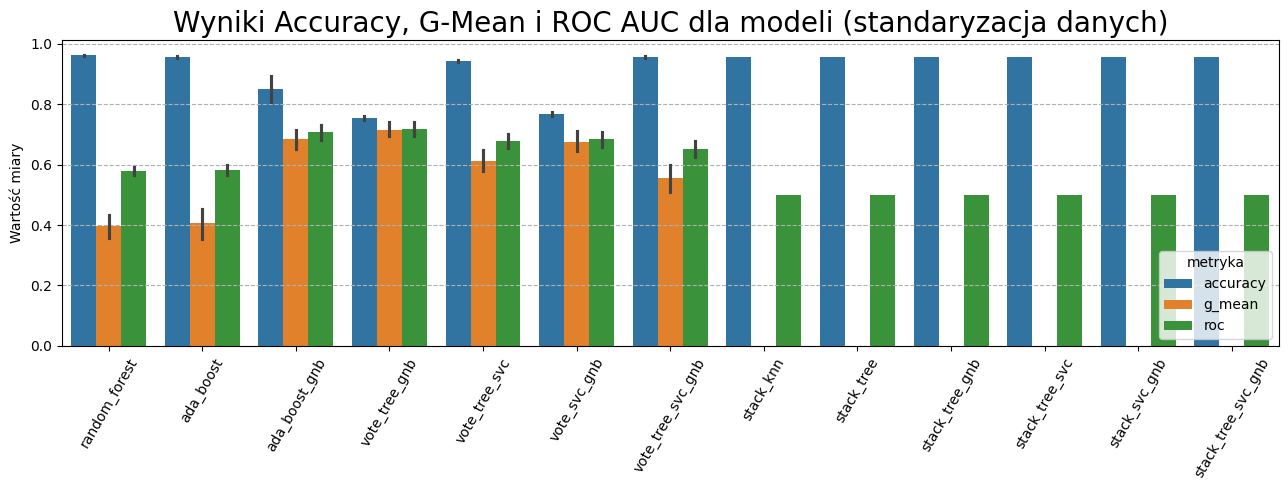

In [20]:
plt.figure(figsize=(13, 5))
ax = sns.barplot(data=df_melted, x='model', y='metric_value', hue='metryka')
plt.xticks(rotation=60)
plt.title("Wyniki Accuracy, G-Mean i ROC AUC dla modeli (standaryzacja danych)", fontsize=20)
plt.xlabel("")
plt.ylabel("Wartość miary")
plt.grid(linestyle='--', axis='y')
plt.tight_layout()
plt.savefig("metrics_standard.png")
plt.show();

Zdecydowałem się na standaryzację, ponieważ jest sporo wartości odstających dla niektórych z cech. Nie wprowadziła ona wielkiej poprawy, wyniki są bardzo zbliżone do tych otrzymanych bez standaryzacji. Najlepsze nadal wydają się być algorytmy AdaBoost oraz Voting.

# Zadanie 6

In [28]:
ada_boost = AdaBoostClassifier(algorithm='SAMME')
parameters = {
    'estimator': [None, DecisionTreeClassifier(), GaussianNB()],
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.5, 1, 2, 5]
}
clf = GridSearchCV(ada_boost, parameters, scoring=make_scorer(geometric_mean_score), cv=10, verbose=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
metrics = []

clf.fit(X_train, y_train)
print("Najlepsze parametry znalezione przez GridSearchCV:")
print(clf.best_params_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV 1/10] END estimator=None, learning_rate=0.5, n_estimators=10;, score=0.000 total time=   1.0s
[CV 2/10] END estimator=None, learning_rate=0.5, n_estimators=10;, score=0.000 total time=   1.0s
[CV 3/10] END estimator=None, learning_rate=0.5, n_estimators=10;, score=0.000 total time=   1.0s
[CV 4/10] END estimator=None, learning_rate=0.5, n_estimators=10;, score=0.000 total time=   1.0s
[CV 5/10] END estimator=None, learning_rate=0.5, n_estimators=10;, score=0.000 total time=   1.0s
[CV 6/10] END estimator=None, learning_rate=0.5, n_estimators=10;, score=0.000 total time=   1.0s
[CV 7/10] END estimator=None, learning_rate=0.5, n_estimators=10;, score=0.000 total time=   1.0s
[CV 8/10] END estimator=None, learning_rate=0.5, n_estimators=10;, score=0.000 total time=   1.0s
[CV 9/10] END estimator=None, learning_rate=0.5, n_estimators=10;, score=0.000 total time=   1.0s
[CV 10/10] END estimator=None, learning_rate=0.5, n_est

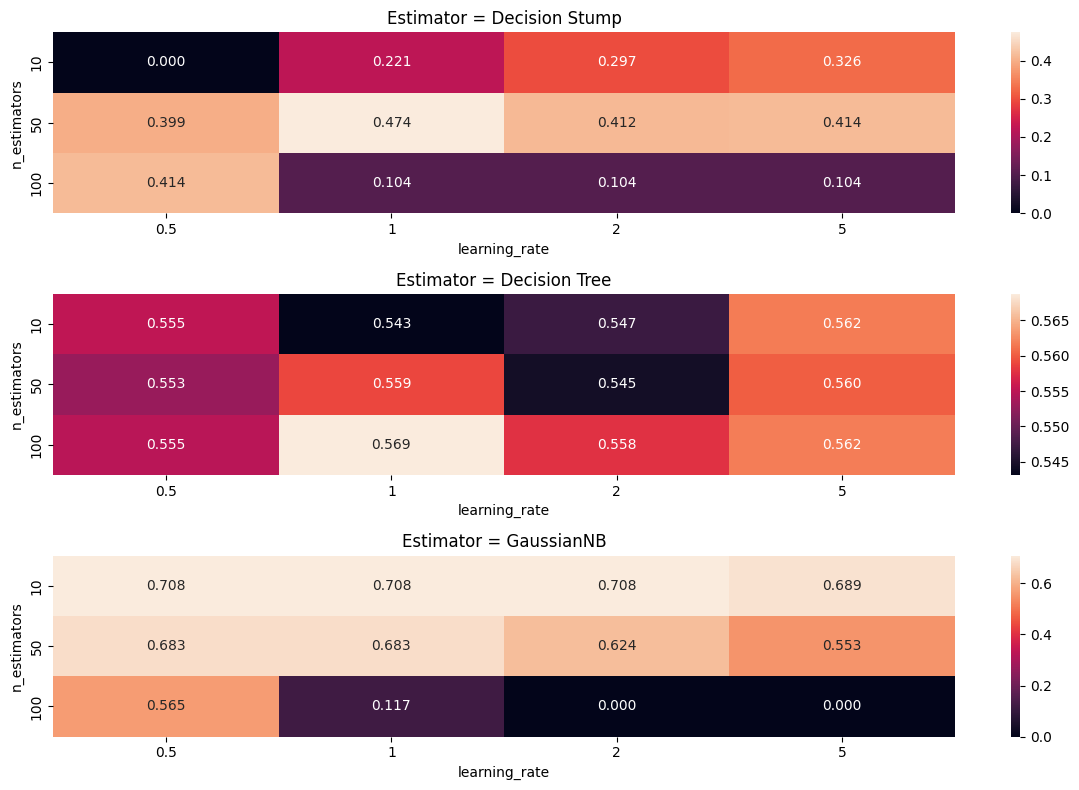

In [31]:
results = clf.cv_results_
scores_mean = np.array(results['mean_test_score']).reshape(len(parameters['estimator']), len(parameters['n_estimators']), len(parameters['learning_rate']))

plt.figure(figsize=(12, 8))
for idx, val in enumerate(['Decision Stump', 'Decision Tree', 'GaussianNB']):
    plt.subplot(3, 1, idx+1)
    sns.heatmap(scores_mean[idx, :, :], 
        annot=True, 
        fmt=".3f", 
        xticklabels=[x if x is not None else 'None' for x in parameters['learning_rate']],
        yticklabels=[x if x is not None else 'None' for x in parameters['n_estimators']],
        # vmin=0.8,
        # vmax=1
    )
    plt.title(f'Estimator = {val}')
    plt.xlabel('learning_rate')
    plt.ylabel('n_estimators')

plt.tight_layout()
plt.savefig('heatmap.png')
plt.show()

In [34]:
ada_boost = AdaBoostClassifier(algorithm='SAMME')
parameters = {
    'estimator': [DecisionTreeClassifier(class_weight='balanced')],
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.5, 1, 2, 5]
}
clf_sm = GridSearchCV(ada_boost, parameters, scoring=make_scorer(geometric_mean_score), cv=10, verbose=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
metrics = []

clf_sm.fit(X_train, y_train)
print("Najlepsze parametry znalezione przez GridSearchCV:")
print(clf_sm.best_params_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END estimator=DecisionTreeClassifier(class_weight='balanced'), learning_rate=0.5, n_estimators=10;, score=0.579 total time=   0.9s
[CV 2/10] END estimator=DecisionTreeClassifier(class_weight='balanced'), learning_rate=0.5, n_estimators=10;, score=0.573 total time=   1.0s
[CV 3/10] END estimator=DecisionTreeClassifier(class_weight='balanced'), learning_rate=0.5, n_estimators=10;, score=0.557 total time=   0.8s
[CV 4/10] END estimator=DecisionTreeClassifier(class_weight='balanced'), learning_rate=0.5, n_estimators=10;, score=0.530 total time=   0.9s
[CV 5/10] END estimator=DecisionTreeClassifier(class_weight='balanced'), learning_rate=0.5, n_estimators=10;, score=0.578 total time=   0.8s
[CV 6/10] END estimator=DecisionTreeClassifier(class_weight='balanced'), learning_rate=0.5, n_estimators=10;, score=0.578 total time=   0.8s
[CV 7/10] END estimator=DecisionTreeClassifier(class_weight='balanced'), learning_rate=0.5,

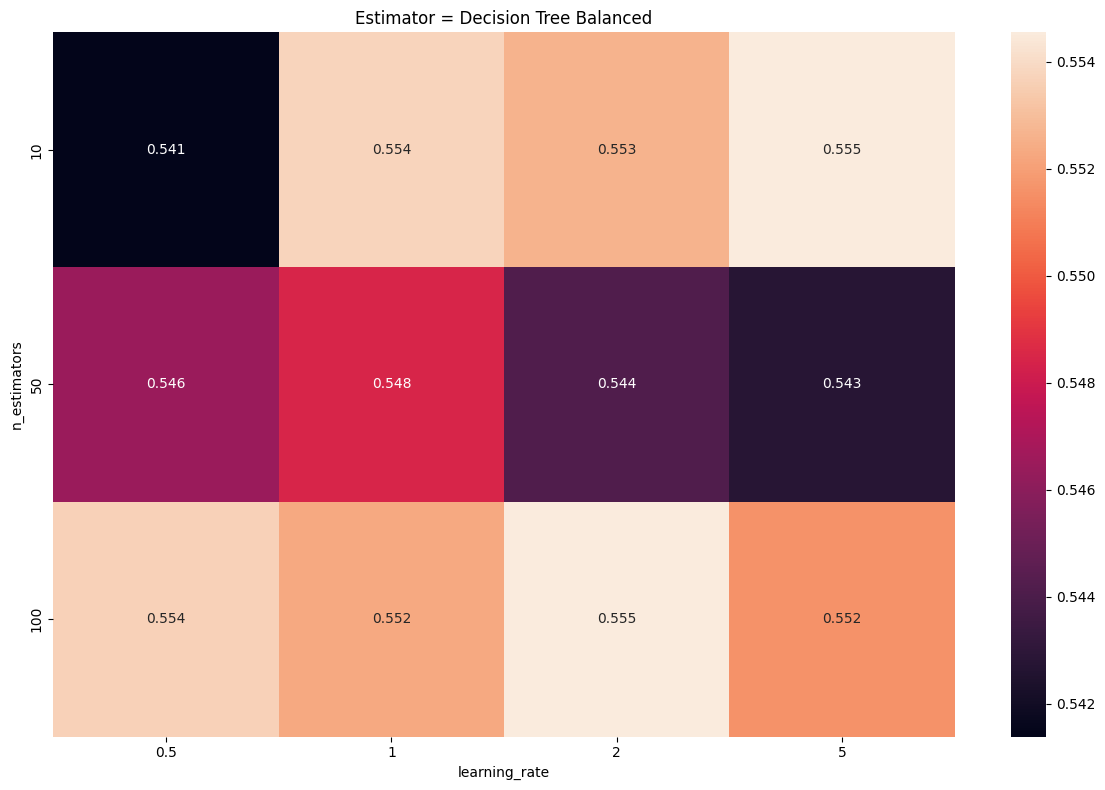

In [36]:
results = clf_sm.cv_results_
scores_mean = np.array(results['mean_test_score']).reshape(len(parameters['estimator']), len(parameters['n_estimators']), len(parameters['learning_rate']))

plt.figure(figsize=(12, 8))
for idx, val in enumerate(['Decision Tree Balanced']):
    plt.subplot(1, 1, idx+1)
    sns.heatmap(scores_mean[idx, :, :], 
        annot=True, 
        fmt=".3f", 
        xticklabels=[x if x is not None else 'None' for x in parameters['learning_rate']],
        yticklabels=[x if x is not None else 'None' for x in parameters['n_estimators']],
        # vmin=0.8,
        # vmax=1
    )
    plt.title(f'Estimator = {val}')
    plt.xlabel('learning_rate')
    plt.ylabel('n_estimators')

plt.tight_layout()
plt.savefig('heatmap_tree_balanced.png')
plt.show()

Jako architekturę do zbadania wybrałem AdaBoost. Najlepsze wyniki udało uzyskać się dla estymatora GaussianNB oraz liczby estymatorów równej 10, większa liczba powoduje pogorszenie wyników. Dodanie class_weight do drzewa decyzyjnego nie powoduje znaczącej poprawy wyników - oscylują one wokół wartości 0.55.
Najlepszy model czyli AdaBoost z GaussianNB oraz liczbą klasyfikatorów 10 i learning rate 0.5 lub 1 uzyskuje 0.708 dla miary G-Mean. Zysk więc wynosi 2 punkty procentowe w porównaniu do AdaBoost z GaussianNB oraz domyślnymi parametrami, ale aż 30 punktów procentowych w porównaniu do domyślnego AdaBoost, który użyty został w poprzednich zadaniach.

# Zadanie 7

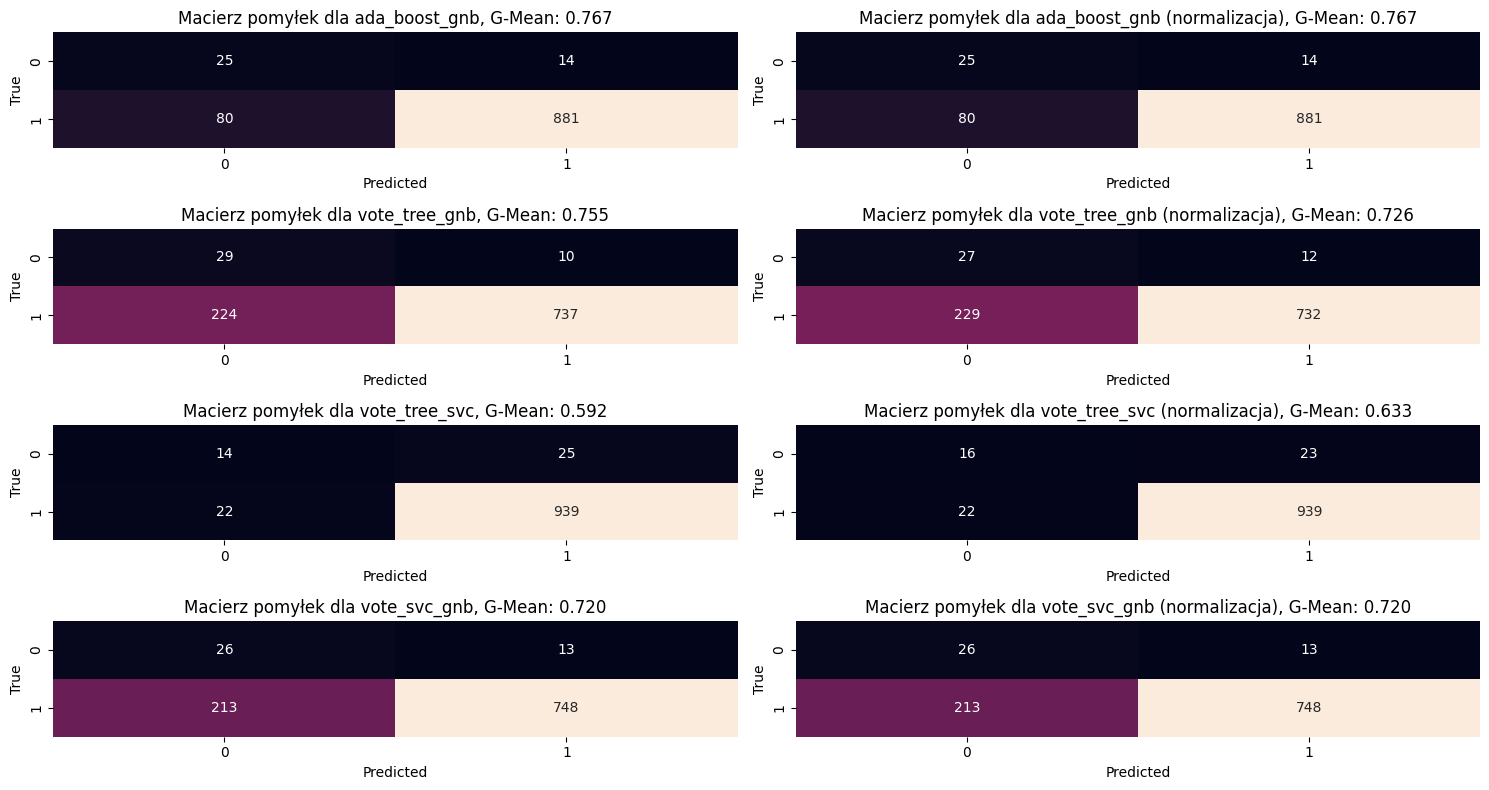

In [42]:
classifiers = {
    'ada_boost_gnb': AdaBoostClassifier(
        GaussianNB(),
        learning_rate=0.5,
        n_estimators=10,
        algorithm='SAMME'
    ),
    'vote_tree_gnb': VotingClassifier(
        [('tree', DecisionTreeClassifier()), ('gnb', GaussianNB())],
    ),
    'vote_tree_svc': VotingClassifier(
        [('tree', DecisionTreeClassifier()), ('svc', SVC())],
    ),
    'vote_svc_gnb': VotingClassifier(
        [('svc', SVC()), ('gnb', GaussianNB())],
    )
}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

plt.figure(figsize=(15, 8))
for idx, (name, model) in enumerate(classifiers.items()):
    plt.subplot(4, 2, idx*2+1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    g_mean = geometric_mean_score(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cbar=False)
    plt.title(f'Macierz pomyłek dla {name}, G-Mean: {g_mean:.3f}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.subplot(4, 2, idx*2+2)
    model.fit(X_train_st, y_train)
    y_pred = model.predict(X_test_st)
    cm = confusion_matrix(y_test, y_pred)
    g_mean = geometric_mean_score(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cbar=False)
    plt.title(f'Macierz pomyłek dla {name} (normalizacja), G-Mean: {g_mean:.3f}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.savefig("confusion_matrices_models.png")
plt.show()

In [43]:
classifiers = {
    'ada_boost_gnb': AdaBoostClassifier(
        GaussianNB(),
        learning_rate=0.5,
        n_estimators=10,
        algorithm='SAMME'
    ),
    'vote_tree_gnb': VotingClassifier(
        [('tree', DecisionTreeClassifier()), ('gnb', GaussianNB())],
    ),
    'vote_tree_svc': VotingClassifier(
        [('tree', DecisionTreeClassifier()), ('svc', SVC())],
    ),
    'vote_svc_gnb': VotingClassifier(
        [('svc', SVC()), ('gnb', GaussianNB())],
    )
}
fold_10 = StratifiedKFold(n_splits=10, shuffle=True)
metrics = []

for name, model in classifiers.items():
    for i, (train_index, test_index) in enumerate(fold_10.split(X, y)):
        X_train, y_train, X_test, y_test = X.loc[train_index], y.loc[train_index], X.loc[test_index], y.loc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        g_mean = geometric_mean_score(y_test, y_pred)
        roc = roc_auc_score(y_test, y_pred)
        metrics.append({'model': name, 'accuracy': accuracy, 'g_mean': g_mean, 'roc': roc})

df_result_bare_7 = pd.DataFrame(metrics)
df_group = df_result_bare_7.groupby('model').agg({'accuracy': ['mean', 'std'],
                                                  'g_mean': ['mean', 'std'],
                                                  'roc': ['mean', 'std']
                                                 })
df_group.columns = ['{}_{}'.format(col[0], col[1]) for col in df_group.columns]
df_group

accuracy_mean  accuracy_std  g_mean_mean  g_mean_std  roc_mean  \
model                                                                           
ada_boost_gnb         0.8942      0.038810     0.703270    0.074456  0.730728   
vote_svc_gnb          0.7708      0.013750     0.688188    0.030854  0.694170   
vote_tree_gnb         0.7556      0.012912     0.712898    0.032444  0.715022   
vote_tree_svc         0.9400      0.006164     0.575146    0.063041  0.656243   

                roc_std  
model                    
ada_boost_gnb  0.054874  
vote_svc_gnb   0.027348  
vote_tree_gnb  0.030839  
vote_tree_svc  0.037656

Standaryzacja nie wpłynęła znacząco na wynik działania, ponieważ wartości zmieniły się o mniej więcej dwa/trzy inaczej zaklasyfikowane przykłady. Na macierzach pomyłek można zaobserwować, że sporo przykładów dla Votingu złożonego z drzewa i GNB oraz SVC i GNB niepoprawnie klasyfikuje przykłady z etykietą 1 jako etykietę 0, próbując tak bardzo nie pomylić się w klasie mniejszościowej, że aż za dużo przykładów jest klasyfikowanych jako "0". Najlepsze G-Mean uzyskane zostało dla AdaBoost wypracowanego w zadaniu 6 i wynosi ono 0.767 na zbiorze testowym. Współpraca klasyfikatorów w ramach AdaBoost jest widoczna i widać, że popełnia on najmniej błędów dzięki temu, że kolejne klasyfikatory skupiają się na coraz trudniejszych przypadkach w trakcie uczenia. Różnica w G-Mean dla AdaBoost oraz Voting(tree, gnb) jest niewielka, bo 0.01, ale na macierzach pomyłek widać, że Voting w tym przypadku klasyfikuje zdecydowanie zbyt dużo przypadków jako "0". W zależności od kontekstu może być to pożądane lub nie (np. być lepiej zaklasyfikować kogoś jako chorego mimo tego, że nie jest chory i przeprowadzić rzetelne badania niż powiedzieć że nie jest chory, a tak naprawdę jest - chociaż z drugiej strony koszty rzetelnych badań mogą też być spore i być może chcielibyśmy takiej sytuacji unikać). Przykładowo Voting(tree, SVC) jest najmniej "chętny" do klasyfikacji przypadków jako "0" z czterech rozpatrywanych klasyfikatorów i przez to uzyskuje małe G-Mean (chociaż nadal pojawiają się False negatives - przykłady zaklasyfikowane jako "0" podczas gdy naprawdę są "1").
Odchylenia standardowe wynoszą dla G-Mean i odpowiednich algorytmów odpowiednio:

- ada_boost_gnb - 0.07
- vote_svc_gnb - 0.03
- vote_tree_gnb - 0.03
- vote_tree_svc - 0.06

Różnice w działaniu algorytmów są istotne, widać to na macierzach pomyłek - żaden z wytrenowanych modeli nie jest idealny i różnią się liczbą False negatives. Jako najlepszy wybrałbym AdaBoost, ponieważ jest dobrym kompromisem pomiędzy klasyfikatorami Voting 